In [4]:
import robotic as ry
import numpy as np
import json
import matplotlib.pyplot as plt
import time

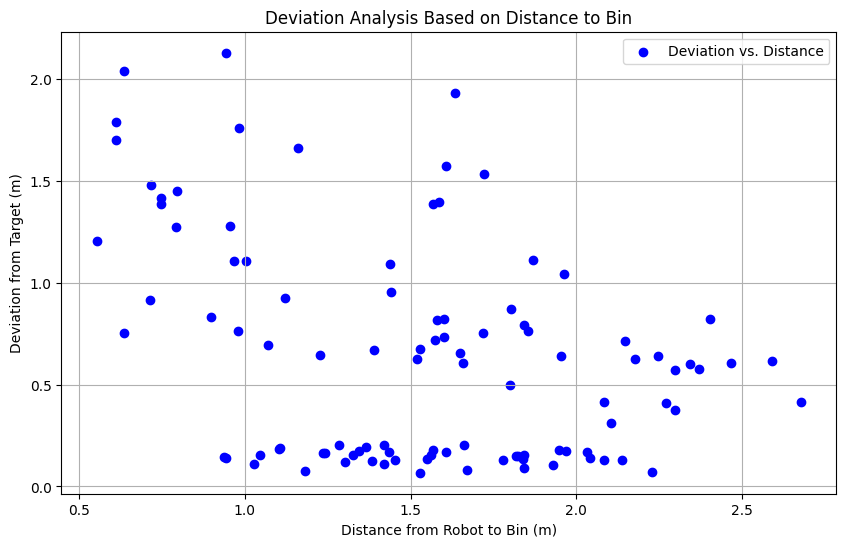

In [5]:
def add_markers_from_json(json_file):
    import numpy as np

    # Load the JSON data
    with open(json_file, "r") as f:
        data = json.load(f)
    
    C = ry.Config()
    C.addFile("throwing_bare.g")
    robot_pos = C.getFrame('l_panda_base').getPosition()

    deviations = []
    distances = []
    # Iterate through each point in the JSON data
    for idx, entry in enumerate(data):
        point = entry["point"]
        result = entry["result"]
        deviation = entry["deviation"]
        deviations.append(deviation)
        
        # Calculate distance from the robot to the bin
        bin_distance = np.linalg.norm(np.array(point[:2]) - np.array(robot_pos[:2]))
        distances.append(bin_distance)

        # Determine the color based on the result
        color = [0, 1, 0] if result else [1, 0, 0]  

        # Add marker frame
        frame_name = f"trajectory-{idx}"
        C.addFrame(frame_name).setShape(ry.ST.marker, [0.2]).setColor(color).setPosition(point)

    # Return the configuration and computed values
    return C, deviations, distances


json_name = "test_res_50cm(withImprovedThrowPos).json"

# Process JSON and compute deviations and distances
C, deviations, distances = add_markers_from_json(json_name)

# Visualize the configuration
C.view()
time.sleep(5)
# Plot deviation vs bin distance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(distances, deviations, color='blue', label='Deviation vs. Distance')
plt.xlabel("Distance from Robot to Bin (m)")
plt.ylabel("Deviation from Target (m)")
plt.title("Deviation Analysis Based on Distance to Bin")
plt.grid(True)
plt.legend()
plt.show()


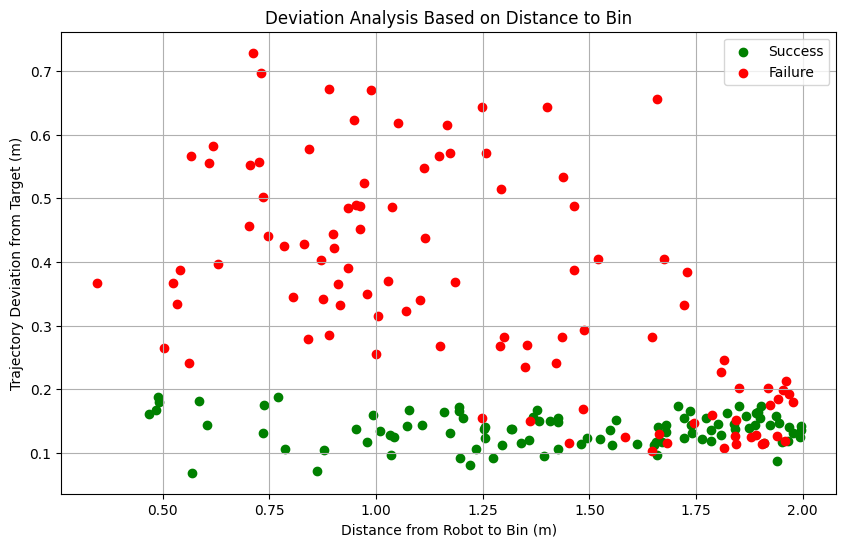

In [8]:
def add_markers_from_json(json_file):
    # Load the JSON data
    with open(json_file, "r") as f:
        data = json.load(f)
    
    C = ry.Config()
    C.addFile("throwing_bare.g")
    robot_pos = C.getFrame('l_panda_base').getPosition()

    deviations_success = []
    distances_success = []
    deviations_failure = []
    distances_failure = []
    
    # Iterate through each point in the JSON data
    for idx, entry in enumerate(data):
        point = entry["point"]
        result = entry["result"]
        deviation = entry.get("trajectory_deviation", 0)
        
        # Calculate distance from the robot to the bin
        bin_distance = np.linalg.norm(np.array(point[:2]) - np.array(robot_pos[:2]))
        
        # Separate data based on success or failure
        if result:
            deviations_success.append(deviation)
            distances_success.append(bin_distance)
        else:
            deviations_failure.append(deviation)
            distances_failure.append(bin_distance)

        # Determine the color based on the result
        color = [0, 1, 0] if result else [1, 0, 0]  

        # Add marker frame
        frame_name = f"trajectory-{idx}"
        C.addFrame(frame_name).setShape(ry.ST.marker, [0.2]).setColor(color).setPosition(point)

    # Return the configuration and separated data
    return C, (distances_success, deviations_success), (distances_failure, deviations_failure)


# Load JSON and process the data
json_name = "test_res_50cm(cylindiricaimproved).json"
C, success_data, failure_data = add_markers_from_json(json_name)

# Unpack data
distances_success, deviations_success = success_data
distances_failure, deviations_failure = failure_data

# Plot deviation vs bin distance
plt.figure(figsize=(10, 6))
plt.scatter(distances_success, deviations_success, color='green', label='Success')
plt.scatter(distances_failure, deviations_failure, color='red', label='Failure')
plt.xlabel("Distance from Robot to Bin (m)")
plt.ylabel("Trajectory Deviation from Target (m)")
plt.title("Deviation Analysis Based on Distance to Bin")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
del C